In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os as os


# If the data file are not exist, download it from the given url.
def download_and_load_data(file_name, url):
    data_dir = 'data'
    file_path = os.path.join(data_dir, file_name)

    # Check if the data file exists
    if not os.path.isfile(file_path):
        # If not, check if the data directory exists
        if not os.path.isdir(data_dir):
            # If not, create the data directory
            os.makedirs(data_dir)
        
        # Download the data file
        print(f'Downloading file from {url} ...')
        !wget -O {file_path} {url}
        print(f'File downloaded and saved to {file_path}')

    # Load data into a dataframe.
    df = pd.read_csv(file_path)
    return df

url = 'https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/mediacal_cost.csv'

medical_cost_df = download_and_load_data('medical_cost.csv', url)


### How BMI related to the medical cost?

Body Mass Index (BMI) is a measurement derived from an individual's weight and height. It is often used as an indicator of body fatness, which can be a predictor of potential health problems. High BMI is usually associated with a higher risk of chronic conditions like heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers.

The BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more).

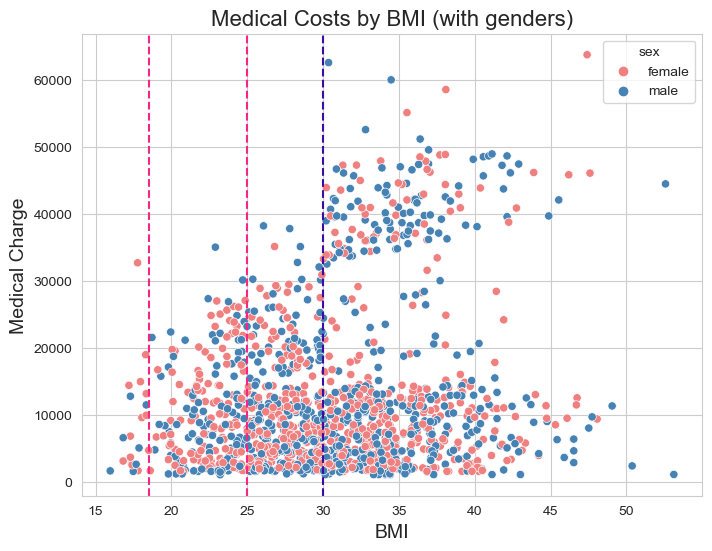

In [2]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(8,6))

# Generate the scatterplot with enhanced aesthetics
sns.scatterplot(data=medical_cost_df, x='bmi', y='charges', hue='sex', palette=['lightcoral', 'steelblue'])

# Draw the lines
plt.axvline(x=18.5, color='#F72585', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = '#F72585', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = '#3A0CA3', linestyle = '--')  # Over 30 - Obese

# Set the labels and title
plt.title("Medical Costs by BMI (with genders)", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Medical Charge", fontsize=14)

# Show the plot
plt.show()

In [3]:
# Group by BMI when individual pay more than $30000

bins_bmi = [medical_cost_df['bmi'].min(), 18.5, 25, 30, medical_cost_df['bmi'].max()]
charges_30k = medical_cost_df[medical_cost_df['charges']>30000]
charges_30k['bmi'].value_counts(bins=bins_bmi, sort=False).rename_axis('BMI Group').reset_index(name='Numbers of Individuals')

,BMI Group,Numbers of Individuals
0,"(15.959000000000001, 18.5]",1
1,"(18.5, 25.0]",2
2,"(25.0, 30.0]",10
3,"(30.0, 53.13]",149


In [4]:
# Individuals who have BMI over or equal to 50
medical_cost_df[medical_cost_df['bmi']>=50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


From the result, we found the following insights:

1. There's a strong positive correlation between BMI and medical charges, especially for charges exceeding $30,000. With increasing BMI, the number of individuals having medical charges over $30,000 also increases significantly. This suggests that a higher BMI could potentially lead to more serious health issues, thus resulting in higher medical costs.

2. The data shows that 149 out of 162 individuals who paid more than $30,000 have a BMI of 30 or more, placing them in the obese category according to World Health Organization standards. This strengthens the evidence of a connection between obesity and high medical costs.

3. There are only three individuals with a BMI over or equal to 50. Two out of these three have charges below the median while one has high charges, suggesting a range of health outcomes at extreme BMI levels. However, the small sample size (only three individuals) makes it difficult to draw concrete conclusions about individuals with a BMI of 50 or higher.

### Do smokers pay more then non-smokers?

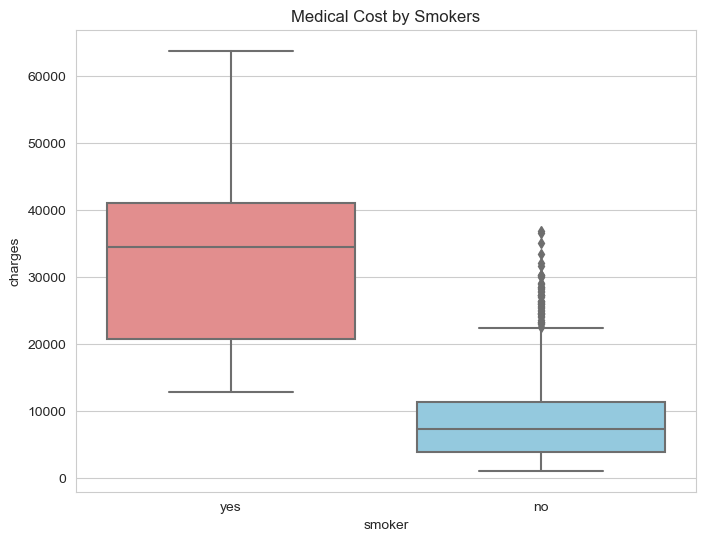

In [5]:
# Smocker and Charges
plt.figure(figsize=(8,6))
sns.boxplot(data=medical_cost_df, x='smoker',y='charges', palette=["lightcoral", "skyblue"])
plt.title("Medical Cost by Smokers")
plt.show()

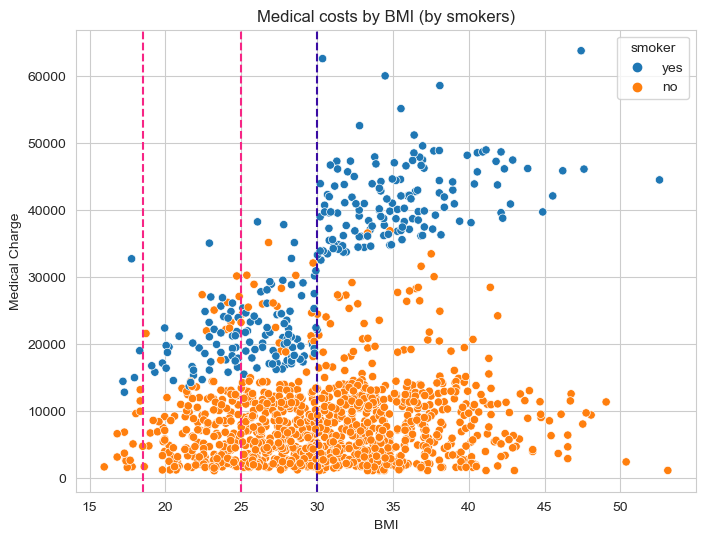

In [6]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(8,6))

# Generate the scatterplot with enhanced aesthetics
sns.scatterplot(data=medical_cost_df, x='bmi', y='charges', hue='smoker')

plt.axvline(x=18.5, color='#F72585', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = '#F72585', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = '#3A0CA3', linestyle = '--')     # Over 30 - Obese

# Set the labels and title
plt.title("Medical costs by BMI (by smokers)")
plt.xlabel("BMI")
plt.ylabel("Medical Charge")
plt.show()

In [7]:
# Find out the minimum medical bills for smokers and non-smokers
medical_cost_df.groupby(['smoker'])['charges'].min()

smoker
no      1121.8739
yes    12829.4551
Name: charges, dtype: float64

From the "Medical Cost with BMI (by Smoker)" chats, our analysis reveals that smoking status plays a significant role in determining medical charges. There's a clear bifurcation of medical bills into two groups based on smoking status. Interestingly, we observe that even among individuals who are obese, those who are non-smokers tend to have lower medical charges compared to their smoker counterparts, indicating that non-smoking has a protective effect even in the face of obesity.

Among individuals with normal BMI values, we notice that a small group pays significantly higher medical bills compared to their peers. This disparity may not be directly attributable to BMI, as these individuals could have other underlying medical conditions causing increased healthcare costs.

In our dataset, there isn't a single smoker whose medical bills are less than about $12,829. This stark contrast underscores the substantial financial implications of smoking on healthcare costs, which seem to be exacerbated among overweight and obese individuals.

Hence, while BMI has a notable impact on healthcare costs, smoking appears to be an even more significant factor. Particularly for overweight and obese individuals, being a smoker tends to inflate medical costs considerably. The preventive public health implications of these findings are considerable, highlighting the importance of addressing both obesity and smoking in efforts to control healthcare costs.

From the "Medical Cost with BMI (by Smoker)" chats, our analysis reveals that smoking status plays a significant role in determining medical charges. There's a clear bifurcation of medical bills into two groups based on smoking status. Interestingly, we observe that even among individuals who are obese, those who are non-smokers tend to have lower medical charges compared to their smoker counterparts, indicating that non-smoking has a protective effect even in the face of obesity.

Among individuals with normal BMI values, we notice that a small group pays significantly higher medical bills compared to their peers. This disparity may not be directly attributable to BMI, as these individuals could have other underlying medical conditions causing increased healthcare costs.

In our dataset, there isn't a single smoker whose medical bills are less than about $12,829. This stark contrast underscores the substantial financial implications of smoking on healthcare costs, which seem to be exacerbated among overweight and obese individuals.

Hence, while BMI has a notable impact on healthcare costs, smoking appears to be an even more significant factor. Particularly for overweight and obese individuals, being a smoker tends to inflate medical costs considerably. The preventive public health implications of these findings are considerable, highlighting the importance of addressing both obesity and smoking in efforts to control healthcare costs.